<a href="https://colab.research.google.com/github/elorie-bernard-lacroix/SmartStudy/blob/main/StudyArchitects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

useful sources:
[Youtube Video](https://youtu.be/GP-2634exqA?si=UBOKqQcrudjINcL4)
[Working with tabular data in Python](https://wandb.ai/mostafaibrahim17/ml-articles/reports/Working-with-tabular-data-in-Python--Vmlldzo4MTU4OTgx)

#Step 1: Setting up the Python environment

In [1]:
!pip install basemap
!pip install scikeras
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step 2: Data collection and preprocessing

In [4]:
# Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/ECE324_Project/Model/database.csv") # change path for your env
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


(2392, 15)

In [5]:
data.isnull().sum()/data.shape[0]*100# checking for percentage null value

,0
StudentID,0.0
Age,0.0
Gender,0.0
Ethnicity,0.0
ParentalEducation,0.0
StudyTimeWeekly,0.0
Absences,0.0
Tutoring,0.0
ParentalSupport,0.0
Extracurricular,0.0


In [6]:
# Handling Missing Values
data=data.interpolate(method ='linear', limit_direction ='forward') #fill in missing (NaN) values in your dataset
# we could also add median or mean or KNNimputer instead of NaN, but since we dont have any missing value we just keep this

In [7]:
#check for duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [8]:
#check for garbage value
#since we dont have any object type data, there would be no garbage value

In [9]:
# check enthinicty distrbution across dataset for any bias
ethnicity_distribution = data['Ethnicity'].value_counts(normalize=True) * 100
print("Ethnicity Distribution in Dataset (%):\n", ethnicity_distribution)
#seems like the data is biased in terms of ethcnicty

Ethnicity Distribution in Dataset (%):
 Ethnicity
0    50.459866
1    20.610368
2    19.648829
3     9.280936
Name: proportion, dtype: float64


 #Step 3: Exploratory data analysis (EDA)

In [10]:
# Explore the dataset so we can visualize data using multivariate analysis
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


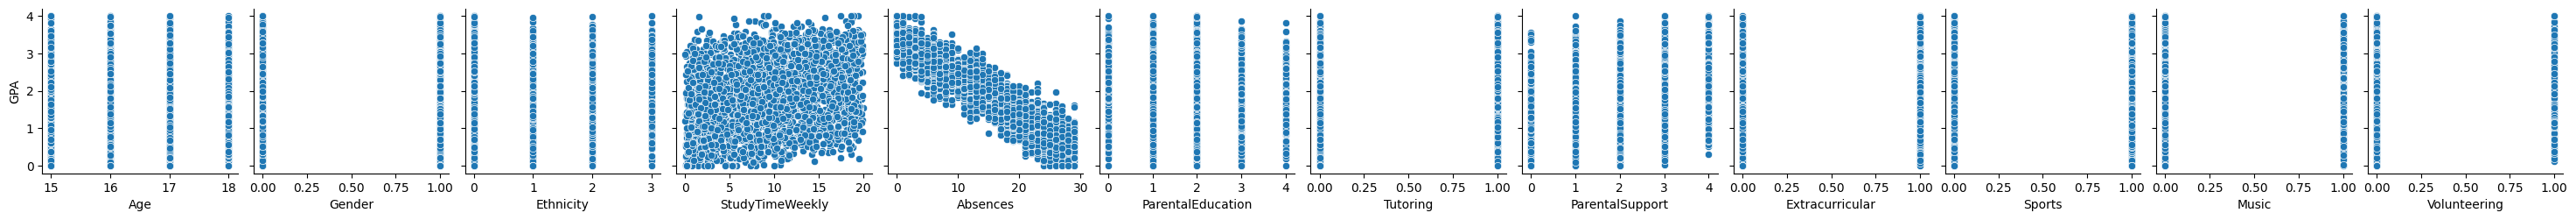

In [16]:
# Pair plot focused on GPA
sns.pairplot(data, x_vars=['Age', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Absences', 'ParentalEducation',
                'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'],
             y_vars=['GPA'], kind='scatter')

plt.show()

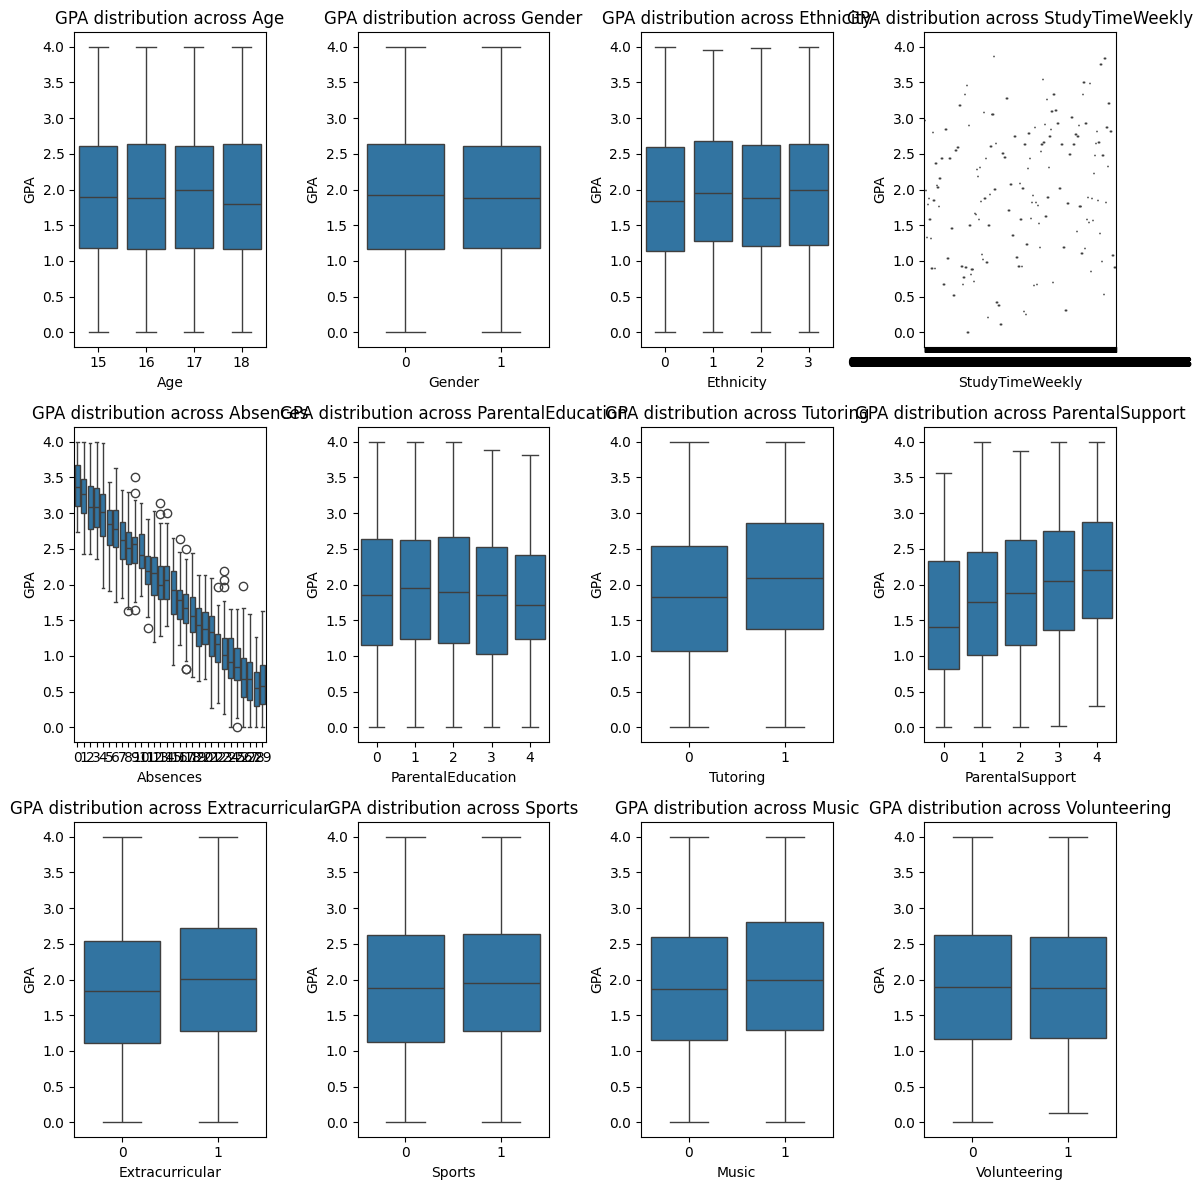

In [20]:
# Plot faceted multigrids

plt.figure(figsize=(12, 12))

# Select categorical variables
cat_features = ['Age', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Absences', 'ParentalEducation',
                'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for i, feature in enumerate(cat_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=data[feature], y=data["GPA"])
    plt.title(f"GPA distribution across {feature}")

plt.tight_layout()
plt.show()

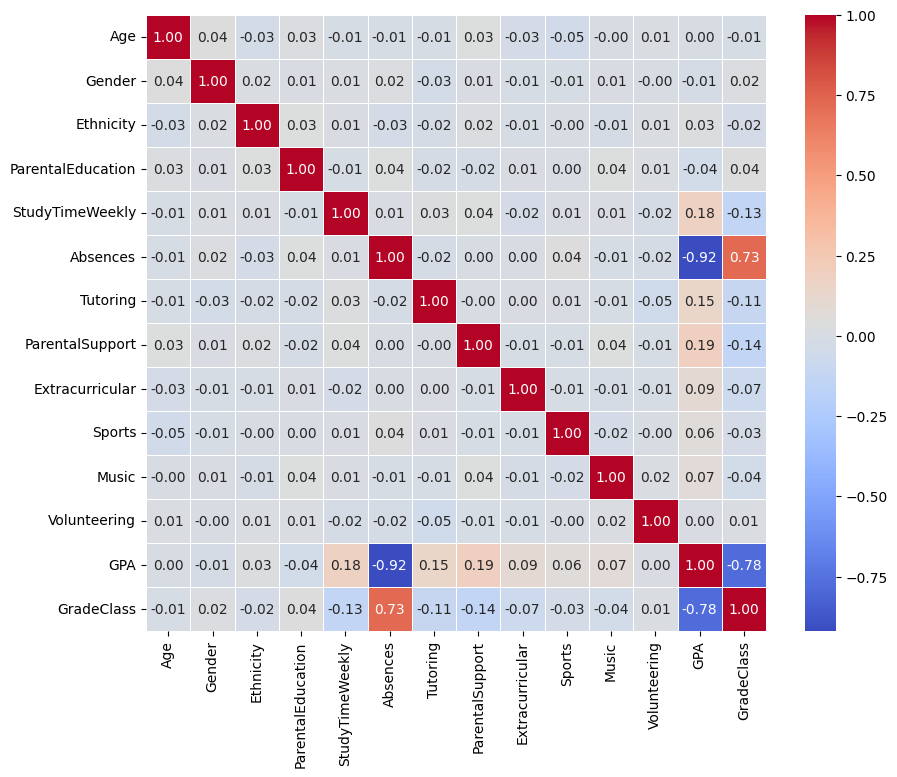

In [21]:
# Plot heat maps

# Select only numerical columns
num_data = data.select_dtypes(include=[np.number]).drop(columns=["StudentID"], errors="ignore")

# Compute correlation matrix
corr = num_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
# Identify outliers

In [ ]:
# Address outliers

#Step 4: Feature engineering

In [ ]:
#from dataset key features include
data = data[['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
             'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
             'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']]
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# do label and one hot encoding
# age, parentalsupport, parental education, ethinicity, garde are already changed to onehot encoding

In [ ]:
#creating new features

#combine ParentalEducation and ParentalSupport into a single metric
data['ParentalInfluence'] = data['ParentalEducation'] * data['ParentalSupport']

# cheking later if this is a good idea or not based on the model!!!!
#categorizing absence into 4 levels
#data['AbsenceLevel'] = pd.cut(data['Absences'], bins=[0,3,7,14, 21], labels=['Ver Low','Low','Moderate', 'High'])

#combine Tutoring and StudyTimeWeekly into a single metric
data['TutoringEffect'] = data['Tutoring'] * data['StudyTimeWeekly']

# cheking later if this is a good idea or not based on the model!!!!
#categorizing StudyTimeWeekly into 3 level
#data['StudyTimeLevel'] = pd.cut(data['StudyTimeWeekly'], bins=[0,5,10,20], labels=['Low','Medium','High'])



In [ ]:

X = data.drop(columns=['GradeClass'])
y = data['GradeClass']

In [ ]:
# features scaling

#normalizng these columns so features with larger ranges (like StudyTimeWeekly)
#cannot dominate the model’s learning process, to make smaller-scale features (like GPA) less important

# not neccesay for XGBOOST or random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importance)


              Feature  Importance
13                GPA    0.569130
6            Absences    0.173278
0           StudentID    0.087594
5     StudyTimeWeekly    0.042203
15     TutoringEffect    0.018026
8     ParentalSupport    0.017920
14  ParentalInfluence    0.017390
3           Ethnicity    0.012561
1                 Age    0.012481
4   ParentalEducation    0.011309
10             Sports    0.008073
9     Extracurricular    0.007395
2              Gender    0.006362
11              Music    0.006325
7            Tutoring    0.005015
12       Volunteering    0.004937


In [ ]:
# remove features with low importance %
features_to_remove = ['StudentID', 'ParentalSupport','ParentalEducation', 'Tutoring'] #dropping ethinicty
X_refined = X.drop(columns=features_to_remove, errors='ignore')

#Step 5: Building the machine learning model

## Random Forest and PCA

In [ ]:
# model baseline
# need to standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA (reduce to top components that explain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# train a Random Forest as Baseline model on the training set inlcluding the Ethinicity column
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"PCA + Random Forest Accuracy: {accuracy:.4f}")

# print explained variance by PCA components and number of component used
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Number of PCA Components Used: {pca.n_components_}")

PCA + Random Forest Accuracy: 0.7850
Explained Variance Ratio: [0.13416863 0.12183259 0.10790915 0.06770605 0.06574847 0.0645112
 0.06397701 0.06313398 0.06189587 0.06120679 0.06073229 0.05851959
 0.05568965]
Number of PCA Components Used: 13


## Model baseline without Enthinicty Column

In [ ]:
X_no_ethnicity = X_refined.drop(columns=['Ethnicity'])

# split data
X_train_no_eth, X_test_no_eth, y_train_no_eth, y_test_no_eth = train_test_split(
    X_no_ethnicity, y, test_size=0.2, random_state=42)
# train model on training set without ethnicity column
model_no_ethnicity = RandomForestClassifier()
model_no_ethnicity.fit(X_train_no_eth, y_train_no_eth)

y_pred_no_eth = model_no_ethnicity.predict(X_test_no_eth)
accuracy_no_ethnicity = accuracy_score(y_test_no_eth, y_pred_no_eth)
print(f"Model Accuracy (Without Ethnicity): {accuracy_no_ethnicity:.4f}")


Model Accuracy (Without Ethnicity): 0.9144


##Model baseline with adjusted weight Enthinicty Column

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

#compute weights based on the training set
sample_weights_train = compute_sample_weight(class_weight="balanced", y=y_train)

#train the model
model_weighted = RandomForestClassifier()
model_weighted.fit(X_train, y_train, sample_weight=sample_weights_train)

y_pred_weighted = model_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Weighted Model Accuracy: {accuracy_weighted:.4f}")



Weighted Model Accuracy: 0.7871


Looks like that the accuray of baseline model is higher by dropping the ethnicity column to address this bias.


In [ ]:
X_no_ethnicity = X_refined.drop(columns=['Ethnicity']) # this address biases in terms of ethnicity in our dataset

## other baseline models

### A) Random Forest with XG Boost

In [ ]:
import xgboost as xgb

# Split data (using the same split as before)
X_train_no_eth, X_test_no_eth, y_train_no_eth, y_test_no_eth = train_test_split(
    X_no_ethnicity, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)
xgb_model.fit(X_train_no_eth, y_train_no_eth)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_no_eth)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test_no_eth, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


XGBoost Accuracy (Without Ethnicity): 0.9102


The following cell is used to tune hyperparamters (may take a while to run).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 4, 5],
  'learning_rate': [0.1, 0.01, 0.001],
  'subsample': [0.8, 0.9, 1.0],
  'colsample_bytree': [0.8, 0.9, 1.0],
  'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_no_eth, y_train_no_eth)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
best_params = {'colsample_bytree': 0.8,
               'gamma': 0,
               'learning_rate': 0.01,
               'max_depth': 3,
               'n_estimators': 300,
               'subsample': 1.0}

xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                                    num_class=len(np.unique(y)),
                                    random_state=42,
                                    **grid_search.best_params_)
xgb_model.fit(X_train_no_eth, y_train_no_eth)

# prediction
y_pred_xgb = xgb_model.predict(X_test_no_eth)

# evaluation
accuracy_xgb = accuracy_score(y_test_no_eth, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.9144


### B) Linear Regression Model
Still needs more tuning.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#evaulation
accuracy_linear = model.score(X_test, y_test)
print(f"Linear Regression Accuracy:  {accuracy_linear}")

Linear Regression Accuracy:  0.6353456937952249


#Step 6. Evaluating the model using Weights & Biases

#Connect to GitHub repo and save changes



In [40]:
!git clone https://github.com/elorie-bernard-lacroix/SmartStudy.git

Cloning into 'SmartStudy'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 59 (delta 16), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 1.08 MiB | 2.88 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [41]:
%cd SmartStudy


/content/drive/MyDrive/ECE324_Project/SmartStudy


In [42]:
!git checkout -b visualization-update


Switched to a new branch 'visualization-update'


In [43]:
!git add .
!git commit -m "Added data visualizations for EDA"


On branch visualization-update
nothing to commit, working tree clean


In [46]:
!git push origin visualization-update


fatal: could not read Username for 'https://github.com': No such device or address
